# Aula 02 - Planejamento de Sistemas Elétricos

- Aula 02b: Implementação Python da Técnica de Programação Dinâmica Estocástica (Adaptada)


In [1]:
usina = [ "UHE MARCATO", 100., 20., 0.95, 60.]
print(usina)
print(type(usina))

['UHE MARCATO', 100.0, 20.0, 0.95, 60.0]
<class 'list'>


DICIONÁRIO

In [2]:
usina = {
 "Nome": "UHE MARCATO",
 "Vmax": 100.,
 "Vmin": 20.,
 "Prod": 0.95,
 "Engol": 60.
}
print(usina["Engol"])

60.0


LISTA E DICIONÁRIO

In [3]:
lista_uhe = []
usina = {
 "Nome": "UHE MARCATO",
 "Vmax": 100.,
 "Vmin": 20.,
 "Prod": 0.95,
 "Engol": 60.
}
#comando append adiciona o dicionário na lista vazia
lista_uhe.append(usina)
print(len(usina))

usina = {
 "Nome": "UHE MARCATO 2",
 "Vmax": 300.,
 "Vmin": 50.,
 "Prod": 0.85,
 "Engol": 100.
}

lista_uhe.append(usina)
print(lista_uhe[0])
print(lista_uhe[1])

#comando for:para percorrer os elementos da lista 
for usin in lista_uhe:
    print(usin["Nome"], usin["Engol"])

5
{'Nome': 'UHE MARCATO', 'Vmax': 100.0, 'Vmin': 20.0, 'Prod': 0.95, 'Engol': 60.0}
{'Nome': 'UHE MARCATO 2', 'Vmax': 300.0, 'Vmin': 50.0, 'Prod': 0.85, 'Engol': 100.0}
UHE MARCATO 60.0
UHE MARCATO 2 100.0


APLICANDO GT E DADOS GERAIS E DICIONÁRIO COM TODOS OS DADOS DO SISTEMAS

In [15]:
lista_uhe = []
usina = {
 "Nome": "UHE MARCATO",
 "Vmax": 100.,
 "Vmin": 20.,
 "Prod": 0.95,
 "Engol": 60.,
 "AFL": [
    [ 23., 16.],
    [ 19., 14.],
    [ 15., 11.]
 ]
     #Cenários = colunas e estágios=linhas
}
lista_uhe.append(usina)
#Lista de UTE - Usinas térmicas
lista_ute = []
#Primeira Usina Térmica
usina = {
    "Nome": "GT1",
    "Capacidade": 15.,
    "Custo": 10.
 }
lista_ute.append(usina)
#Segunda usina
usina = {
    "Nome": "GT2",
    "Capacidade": 10.,
    "Custo": 25.
}
lista_ute.append(usina)

#Dados Gerais - variavéis
d_gerais = {
    "CDef": 500.,
    "Carga": [50.,50.,50.,],#mes1, mês2, mês3, ...
    "N_Disc":3,
    "N_Est": 3,
    "N_Cen": 2.
}

#Sistema - Dicionário compactando todas as informações
sistema = {
    "DGer": d_gerais,
    "UHE": lista_uhe,
    "UTE": lista_ute
}
print(sistema["UTE"],[0],["Nome"])

[{'Nome': 'GT1', 'Capacidade': 15.0, 'Custo': 10.0}, {'Nome': 'GT2', 'Capacidade': 10.0, 'Custo': 25.0}] [0] ['Nome']


PROBLEMA DE DESPACHO TÉRMICO DA  AULA 01

Tabela com os seguintes dados:

   - Discretizações(Armazenamento(hm³))
   - Afluência 
   - Decisões Ótimas(Variavéis):
       1. UHEs (Volume final, Volume turbinado e Volume vertido),
       2. UTEs (Usar usina térmica 1 ou 2, GT1 e GT2)
       3. Def (Défict)
   - Custo imediato
   - Custo Ótimo
   - Custo de Operação

    FUNÇÃO OBJETIVO
    Custo Imediato

$Min \hspace{0.5cm}C_1 \cdot GT_1 + C_2 \cdot GT_2 + Cdef \cdot DEF + 0.01 \cdot V_v$

    BALANÇO HÍDRICO
    
$V_f= V_i + AFL - V_t - V_v$

    ATENDIMENTO À DEMANDA
 
$CARGA = \rho \cdot V_t + GT_1 + GT_2 + DEF$

    RESTRIÇÕES DE CANALIZAÇÃO
    Limites superiores e inferiores das variavéis de decisão

$20 \le V_f \le 100 $

$0 \le V_t \le 60 $

$0 \le V_v \le \infty $

$0 \le GT_1 \le 15 $

$0 \le GT_2 \le 25 $

$0 \le DEF \le \infty $

# Continuação Aula 02b

    CRIAÇÃO DE FUNÇÃO PARA O DESPACHO   
    RESTRIÇÕES
    RESULTADOS
    GRÁFICOS
    

In [19]:
from cvxopt.modeling import variable, solvers
from cvxopt.modeling import op
def despacho(sistema, VI, AFL, imprime):

    Num_UHE = len(sistema["UHE"])
    Num_UTE = len(sistema["UTE"])
    print(Num_UTE)

    #Variavéis de Decisão de volume final
    #Por isso a necessidade de Num_UTE e Num_UHE
    vf = variable(Num_UHE, "Volume final da Usina")
    vturb = variable(Num_UHE, "Volume Turbinado da Usina")
    vv = variable(Num_UHE, "Volume Vertido da Usina")
    gt = variable(Num_UTE, "Geração na Usina Térmica")
    deficit = variable(1, "Déficit de Energia no Sistema")


    print(vf.name)
    print(deficit.value)
    #Após resolver o problema de otimização "none"

    #CONSTRUÇÃO DA FUNÇÃO OBJETIVO
    #𝑀𝑖𝑛𝐶1⋅𝐺𝑇1+𝐶2⋅𝐺𝑇2+𝐶𝑑𝑒𝑓⋅𝐷𝐸𝐹+0.01⋅𝑉𝑣
    #𝑀𝑖𝑛𝐶1⋅𝐺𝑇1+𝐶2⋅𝐺𝑇2
    fob = 0
    for i, usin in enumerate(sistema["UTE"]):
        fob += usin['Custo']*gt[i]

    #𝐶𝑑𝑒𝑓⋅𝐷𝐸𝐹
    fob += sistema["DGer"]["CDef"]*deficit[0]

    #0.01⋅𝑉𝑣
    #E percorrer todas as usinas
    for i,usin in enumerate(sistema["UHE"]):
        fob += 0.01*vv[i]

    print(fob)#Custo Total


    #DEFINIÇÃO DAS RESTRIÇÕES
    #BALANÇO HÍDRICO
    #𝑉𝑓=𝑉𝑖+𝐴𝐹𝐿−𝑉𝑡−𝑉𝑣
    restricoes = []
    for i, usin in enumerate(sistema["UHE"]):
        restricoes.append(vf[i] == float(VI[i]) + float(AFL[i]) - vturb[i] - vv[i])

    #ATENDIMENTO À DEMANDA
    #𝐶𝐴𝑅𝐺𝐴=𝜌⋅𝑉𝑡+𝐺𝑇1+𝐺𝑇2+𝐷𝐸𝐹
    #𝜌⋅𝑉𝑡
    AD = 0
    for i, usin in enumerate(sistema["UHE"]):
        AD += usin ["Prod"]*vturb[i]

    #𝐺𝑇1+𝐺𝑇2
    for i, usin in enumerate(sistema["UTE"]):
        AD += gt[i]

    #𝐷𝐸𝐹
    AD += deficit[0]

    restricoes.append(AD == sistema["DGer"]["Carga"][2]) #2=estágios
    print(restricoes[0])


    #RESTRIÇÕES DE CANALIZAÇÃO
    #Limites superiores e inferiores das variavéis de decisão
        #20≤𝑉𝑓≤100
        #0≤𝑉𝑡≤60
        #0≤𝑉𝑣≤∞

    for i, usin in enumerate(sistema["UHE"]):
        restricoes.append(vf[i] >= usin["Vmin"])
        restricoes.append(vf[i] <= usin["Vmax"])
        restricoes.append(vturb[i] >= usin["Engol"])
        restricoes.append(vturb[i] <= usin["Engol"])
        restricoes.append(vv[i] >= 0)

        #0≤𝐺𝑇1≤15
        #0≤𝐺𝑇2≤25
    for i, usin in enumerate(sistema["UTE"]):
        restricoes.append(gt[i] >= 0)
        restricoes.append(gt[i] <= usin["Capacidade"])

        #0≤𝐷𝐸𝐹≤∞
    restricoes.append( deficit[0] >= 0)
    
    problema = op(fob,restricoes)
    problema.solve('dense', 'glpk')
    DGer = {
        "Deficit": deficit[0].value,
        "CMO": restricoes[Num_UHE].multiplier.value[0],
        "CustoTotal": fob.value()[0]
    }
    #Armazenar os dados das usinas hídricas
    lista_uhe = []
    for i, usin in enumerate(sistema["UHE"]):
        resultado = {
            "vf": vf[i].value()[0],
            "vturb": vturb[i].value()[0],
            "vv": vv[i].value()[0],
            "CMA": restricoes[i].multiplier.value[0]
        }
        
        lista_uhe.append(resultado)
    
    #Armazenar os dados das usinas térmicas
    lista_ute = []
    for i, usin in enumerate(sistema["UTE"]):
        resultado = {
            "gt": gt[i].value()[0],
        }
        lista_ute.append(resultado)
        
    #Dicionário de dados com todos os resultados dos problemas de otimização
    resultado = {
        "DGer": DGer,
        "UHE": lista_uhe,
        "UTE": lista_ute
    }
    
    
    if imprime:
        print("Custo Total: ",fob.value())
        
        for i, usin in enumerate(sistema['UHE']):
            print(vf.name, i,'é ', vf[i].value(),'hm³')
            print(vturb.name, i,'é ', vturb[i].value(),'hm³')
            print(vv.name, i,'é ', vv[i].value(),'hm³')
        
        for i, usin in enumerate(sistema['UTE']):
            print(gt.name, i,"é ",gt[i].value(), 'MWmed')
        
        print(deficit.name,'é', deficit[0].value(), 'MWmed')
        
        for i, usin in enumerate(sistema['UHE']):
            print('Custo Marginal da Água(CMA)',i,' é: ', restricoes[i].multiplier.value)
            print('O Valor Marginal de Operação é: ', restricoes[Num_UHE].multiplier.value)
            #Mulpicador de Lagrange
            
    #Final da Função
    return(resultado)
            

### DESPACHO

    - DISCRETIZAÇÕES
    - UTILIZAÇÃO DA BIBLIOTECA ITERTOOLS

In [6]:
import itertools
from itertools import product, tee

#Trabalhando com 3 discretizações em cada usina
#E essas discretizações são produto do itertools
discretizacoes = product([0, 50, 100], repeat = 2) #repeat corresponde as usinas
print (discretizacoes)

for discret in discretizacoes:
    print(discret)
    

(0, 0)
(0, 50)
(0, 100)
(50, 0)
(50, 50)
(50, 100)
(100, 0)
(100, 50)
(100, 100)


In [17]:
discretizacoes = product([0, 25, 50, 75, 100], repeat = 2) #repeat corresponde as usinas
print (discretizacoes)

for discret in discretizacoes:
    print(discret)
    print(discret[0], discret[1])

(0, 0)
0 0
(0, 25)
0 25
(0, 50)
0 50
(0, 75)
0 75
(0, 100)
0 100
(25, 0)
25 0
(25, 25)
25 25
(25, 50)
25 50
(25, 75)
25 75
(25, 100)
25 100
(50, 0)
50 0
(50, 25)
50 25
(50, 50)
50 50
(50, 75)
50 75
(50, 100)
50 100
(75, 0)
75 0
(75, 25)
75 25
(75, 50)
75 50
(75, 75)
75 75
(75, 100)
75 100
(100, 0)
100 0
(100, 25)
100 25
(100, 50)
100 50
(100, 75)
100 75
(100, 100)
100 100


In [47]:
from itertools import product
import numpy as np
import matplotlib.pyplot as plt


Num_UHE = len(sistema["UHE"])
Num_UTE = len(sistema["UTE"])

passo = 100/ (sistema["DGer"]["N_Disc"]-1) 
#Número de discretizações, disponível em d_gerais
#Passo corresponde ao intervalo(50 em 50 ou 25 em 25 como no caso abaixo

lista = np.arange(0, 100+passo, passo)
discretizacoes = product(np.arange(0, 100+passo, passo), repeat = Num_UHE) 
#repeat corresponde as usinas
#ele passa de ser um produto e passa ser uma lista
discretizacoes = list(discretizacoes)

for estag in np.arange(sistema["DGer"]["N_Est"],0, -1):
    #Imprimir o gráfico da Função de Custo Futuro
     if Num_UHE == 1:
        plt.figure(estag)
        plt.title("Função de Custo Futuro")
        plt.xlabel("Volume Inicial (hm³)")
        plt.ylabel("Custo Total")
        eixox = []
        eixoy = []
    
    
for discret in discretizacoes:
    print(estag, discret)
       #Para várias usinas
    VI = []
    for i, usin in enumerate(sistema["UHE"]):
        VI.append(usin["Vmin"]+(usin["Vmax"]- usin["Vmin"])*discret[i]/100)#Cálculo do volume útil
    if Num_UHE == 1:
        eixox.append(VI[0])
            
        #Para vários cenários
for cenarios in np.arange(0, sistema["DGer"]["N_Cen"]):
            
    AFL = []
    for i, usin in enumerate(sistema["UHE"]):
       AFL.append(usin ["AFL"][estag-1][cenarios])
        print (estag, discret, VI, cenarios, AFL)
            #Após todos os dados das variavéis
            #Função DESPACHO
        resultado = despacho(sistema, VI, AFL, imprime = False )
        print(resultado)
        media += resultado["DGer"]["CustoTotal"]
        media = media/sistema["DGer"]["N_Cen"]
         if Num_UHE == 1:
            eixoy.append(media)
         if Num_UHE == 1:
    plt.plot(eixox, eixoy, marker="o", color="orange" )

#media += custo_total

#Error: A variável problema não estava definida
#Error: vf[i] == float(VI[i]) + float(AFL[i]) - vturb[i] - vv[i], consertado transformando as constantes em float
#O volume turbinado é prepoderado por vturb*0.95
#É necessário computar o valor médio do custo total tanto para um cenário otimista e pessimista
#Essa média equivale ao Custo Ótimo
            

IndentationError: unexpected indent (3673754801.py, line 45)

### GRÁFICOS

        BIBLIOTECA MATPLOTLIB

Text(0, 0.5, 'Custo Total ($)')

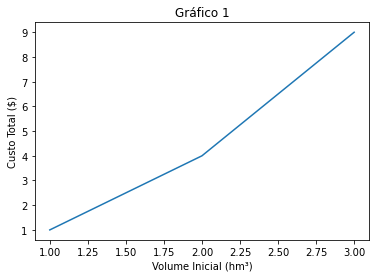

In [31]:
import matplotlib 
import matplotlib.pyplot as plt
plt.plot([1,2,3],[1,4,9])
plt.title("Gráfico 1")
plt.xlabel("Volume Inicial (hm³)")
plt.ylabel("Custo Total ($)")


Text(0, 0.5, 'Custo Total ($)')

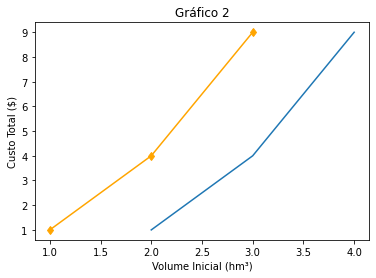

In [33]:
plt.plot([2,3,4],[1,4,9])
plt.plot([1,2,3],[1,4,9], marker ="d", color="orange")
plt.title("Gráfico 2")
plt.xlabel("Volume Inicial (hm³)")
plt.ylabel("Custo Total ($)")

Text(0, 0.5, 'Custo Total ($)')

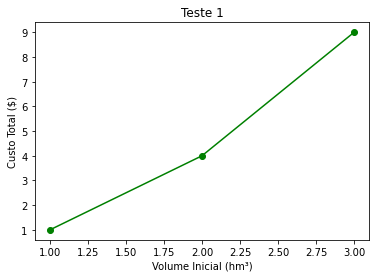

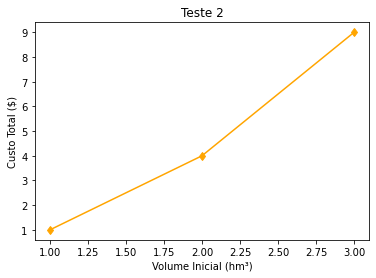

In [37]:
plt.figure(1)
plt.plot([1,2,3],[1,4,9], marker ="o", color="green")
plt.title("Teste 1")
plt.xlabel("Volume Inicial (hm³)")
plt.ylabel("Custo Total ($)")

plt.figure(2)
plt.plot([1,2,3],[1,4,9], marker ="d", color="orange")
plt.title("Teste 2")
plt.xlabel("Volume Inicial (hm³)")
plt.ylabel("Custo Total ($)")